In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def read_data(file_path, file_type):
    if file_type == 'csv':
        df = pd.read_csv(file_path)
    elif file_type == 'excel':
        df = pd.read_excel(file_path)
    elif file_type == 'sql':
        # TODO: implement reading data from a SQL database
        pass
    else:
        raise ValueError(f"Unsupported file type: {file_type}")
    return df

In [4]:
def preprocess_data(df):
    # Handle missing values
    df = df.fillna(df.mean())

    # Encode categorical features
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = le.fit_transform(df[col])

    # Scale numerical features
    scaler = StandardScaler()
    df[df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df[df.select_dtypes(include=['number']).columns])

    return df


In [5]:
def reduce_dimensionality(df, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(df)
    reduced_df = pca.transform(df)
    return reduced_df

In [18]:
def histogram(df, edgecolor, figsize):
    df.hist(edgecolor=edgecolor, linewidth=1.2, figsize=figsize);
    return plt.show()

def histogram_one_col(df, column):
    plt.hist(df[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    return plt.show()

In [26]:
def heatmap(df, figsize):
  plt.figure(figsize=figsize)
  sns.heatmap(df.corr(), annot=True)

In [50]:
def box(df, column1, column2):
    sns.boxplot(x=column1, y=column2, data=df)
    return plt.show()

In [49]:
def pairplot(df):
  return sns.pairplot(df, height=2)

In [8]:
def scatter(df, column1, column2):
    plt.scatter(df[column1], df[column2])
    return plt.show()

In [9]:
df = read_data('International_Report_Departures.csv', 'csv')

In [10]:
df = df.head(100)

In [11]:
df

data_dte  Year  Month  usg_apt_id usg_apt  usg_wac  fg_apt_id fg_apt  \
0   05/01/2006  2006      5       12016     GUM      5.0    13162.0    MAJ   
1   05/01/2003  2003      5       10299     ANC      1.0    13856.0    OKO   
2   03/01/2007  2007      3       10721     BOS     13.0    12651.0    KEF   
3   12/01/2004  2004     12       11259     DAL     74.0    16271.0    YYZ   
4   05/01/2009  2009      5       13303     MIA     33.0    11075.0    CMW   
..         ...   ...    ...         ...     ...      ...        ...    ...   
95  09/01/2005  2005      9       11540     ELP     74.0    16078.0    YHM   
96  12/01/2001  2001     12       12892     LAX     91.0    13252.0    MEX   
97  07/01/2002  2002      7       13891     ONT     91.0    13594.0    MZT   
98  08/01/2009  2009      8       13667     NGU     38.0    13618.0    NBW   
99  06/01/2009  2009      6       15045     SUU     91.0    13856.0    OKO   

    fg_wac  airlineid carrier  carriergroup        type  Scheduled  Charter  \
0    844.0    20177.0     PFQ           1.0  Departures        0.0     10.0   
1    736.0    20007.0      5Y           1.0  Departures        0.0     15.0   
2    439.0    20402.0      GL           1.0  Departures        0.0      1.0   
3    936.0    20201.0     AMQ           1.0  Departures        0.0      1.0   
4    219.0    21323.0      5L           0.0  Departures        0.0     20.0   
..     ...        ...     ...           ...         ...        ...      ...   
95   936.0    20447.0      U7           1.0  Departures        0.0      1.0   
96   148.0    20007.0      5Y           1.0  Departures        0.0      2.0   
97   148.0    20399.0     PLQ           1.0  Departures        0.0      6.0   
98   219.0    20402.0      GL           1.0  Departures        0.0      1.0   
99   736.0    20057.0      EZ           1.0  Departures        0.0     17.0   

    Total  
0    10.0  
1    15.0  
2     1.0  
3     1.0  
4    20.0  
..    ...  
95    1.0  
96    2.0  
97    6.0  
98    1.0  
99   17.0  

[100 rows x 16 columns]

In [12]:
df = preprocess_data(df)

<ipython-input-4-9b70b2815b3f>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [13]:
df

data_dte      Year     Month  usg_apt_id   usg_apt   usg_wac  fg_apt_id  \
0  -0.279267  0.189117 -0.241339   -0.748797 -0.659185 -1.486745  -0.223488   
1  -0.332869 -0.945587 -0.241339   -1.966174 -1.818363 -1.646439   0.147806   
2  -0.708084  0.567352 -0.815957   -1.666970 -1.741084 -1.167359  -0.496876   
3   1.704011 -0.567352  1.769823   -1.285520 -1.431970  1.267965   1.439847   
4  -0.172063  1.323822 -0.241339    0.163704  0.036321 -0.368892  -1.340047   
..       ...       ...       ...         ...       ...       ...        ...   
95  0.953581 -0.189117  0.907896   -1.086287 -1.122856  1.267965   1.336590   
96  1.596806 -1.702056  1.769823   -0.127701 -0.272793  1.946662  -0.175338   
97  0.310356 -1.323822  0.333278    0.580604  0.577270  1.946662   0.007635   
98  0.846377  1.323822  0.620587    0.421785  0.345435 -0.169275   0.020475   
99  0.256754  1.323822  0.045969    1.398807  1.659169  1.946662   0.147806   

      fg_apt    fg_wac  airlineid   carrier  carriergroup  type  Scheduled  \
0  -0.256003  1.292761  -0.190483  0.509682      0.515580   0.0        0.0   
1   0.189650  0.928945  -0.693310 -1.206205      0.515580   0.0        0.0   
2  -0.652139 -0.071551   0.475023 -0.125832      0.515580   0.0        0.0   
3   1.526610  1.602679  -0.119495 -0.761346      0.515580   0.0        0.0   
4  -1.345377 -0.812658   3.199162 -1.269757     -1.939563   0.0        0.0   
..       ...       ...        ...       ...           ...   ...        ...   
95  1.229508  1.602679   0.608125  1.399402      0.515580   0.0        0.0   
96 -0.156969 -1.051834  -0.693310 -1.206205      0.515580   0.0        0.0   
97 -0.008418 -1.051834   0.466150  0.573234      0.515580   0.0        0.0   
98  0.090616 -0.812658   0.475023 -0.125832      0.515580   0.0        0.0   
99  0.189650  0.928945  -0.545419 -0.380037      0.515580   0.0        0.0   

     Charter     Total  
0   0.121284  0.121284  
1   0.435492  0.435492  
2  -0.444289 -0.444289  
3  -0.444289 -0.444289  
4   0.749699  0.749699  
..       ...       ...  
95 -0.444289 -0.444289  
96 -0.381448 -0.381448  
97 -0.130082 -0.130082  
98 -0.444289 -0.444289  
99  0.561175  0.561175  

[100 rows x 16 columns]

In [ ]:
reduce_dimensionality(df, 5)

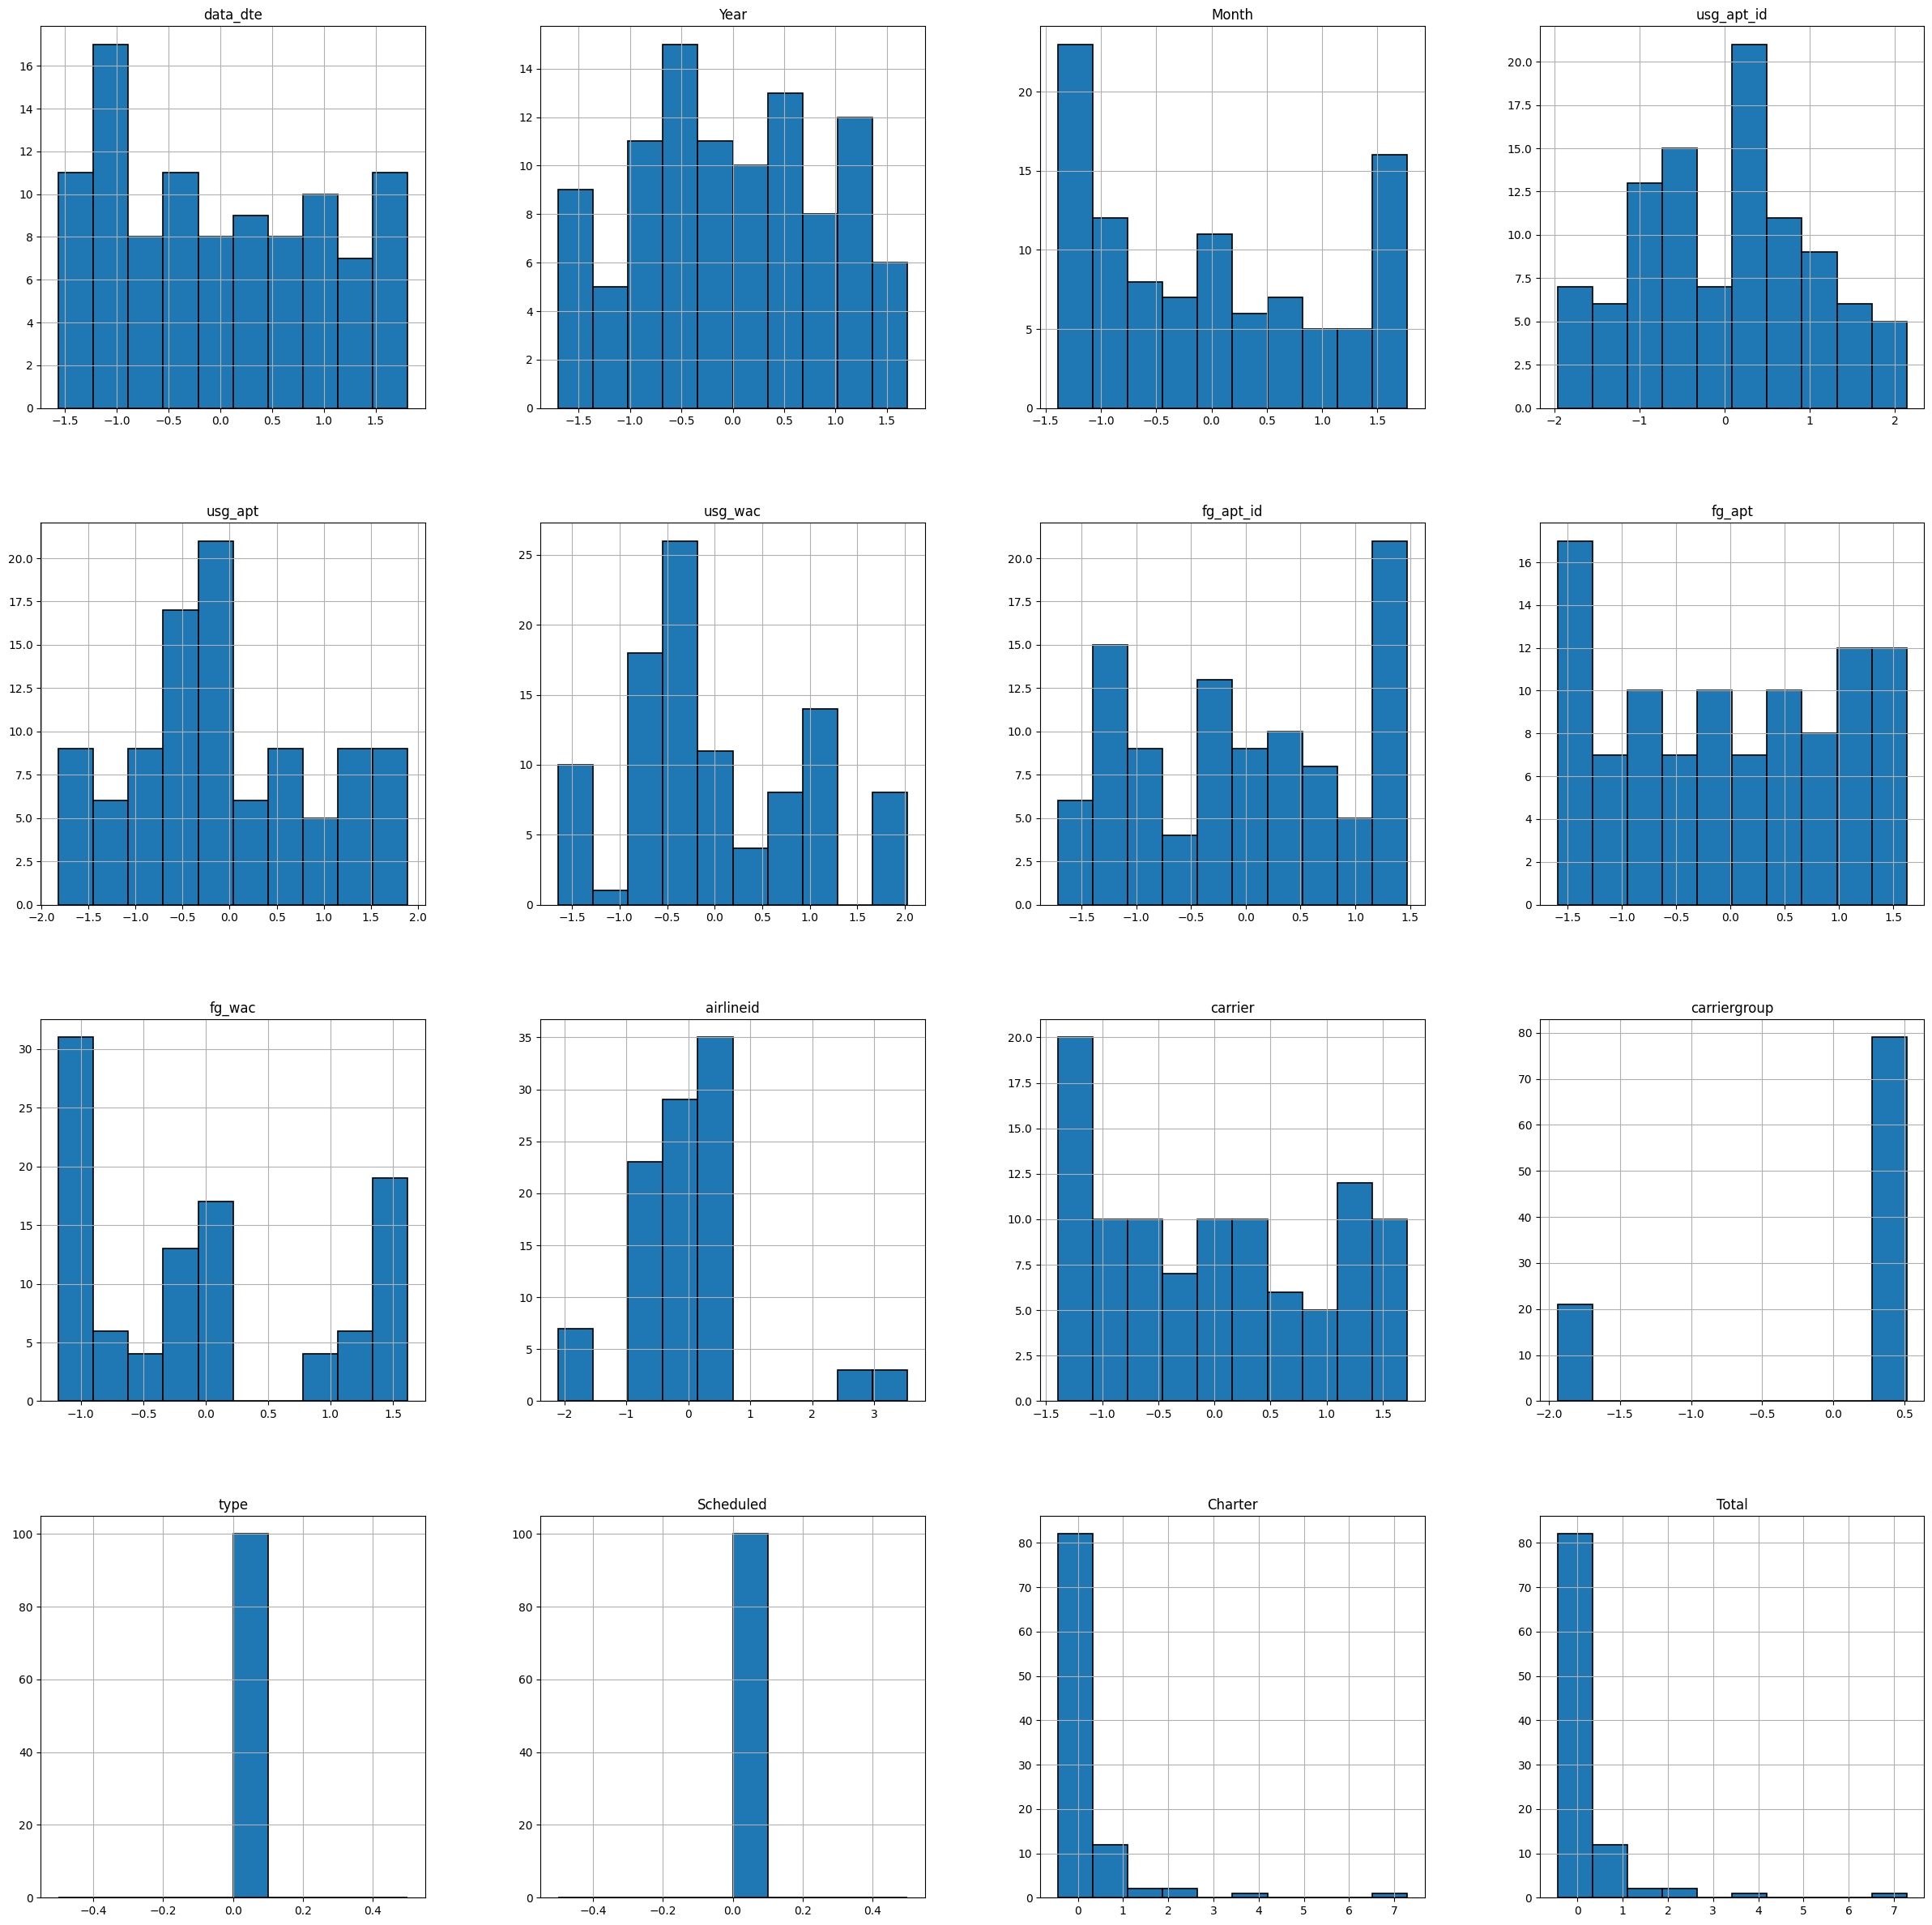

In [17]:
histogram(df, edgecolor="black", figsize=(30, 30))

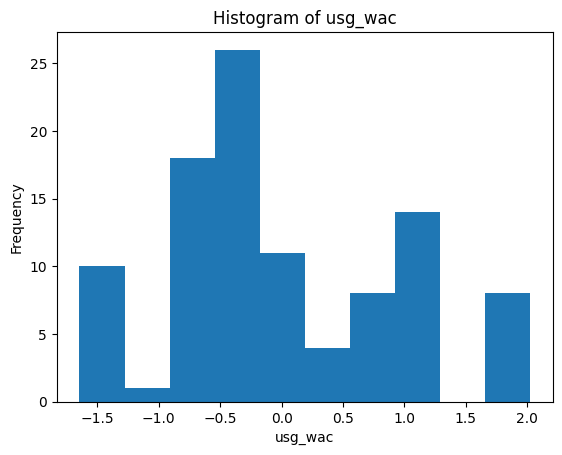

In [19]:
histogram_one_col(df, 'usg_wac')

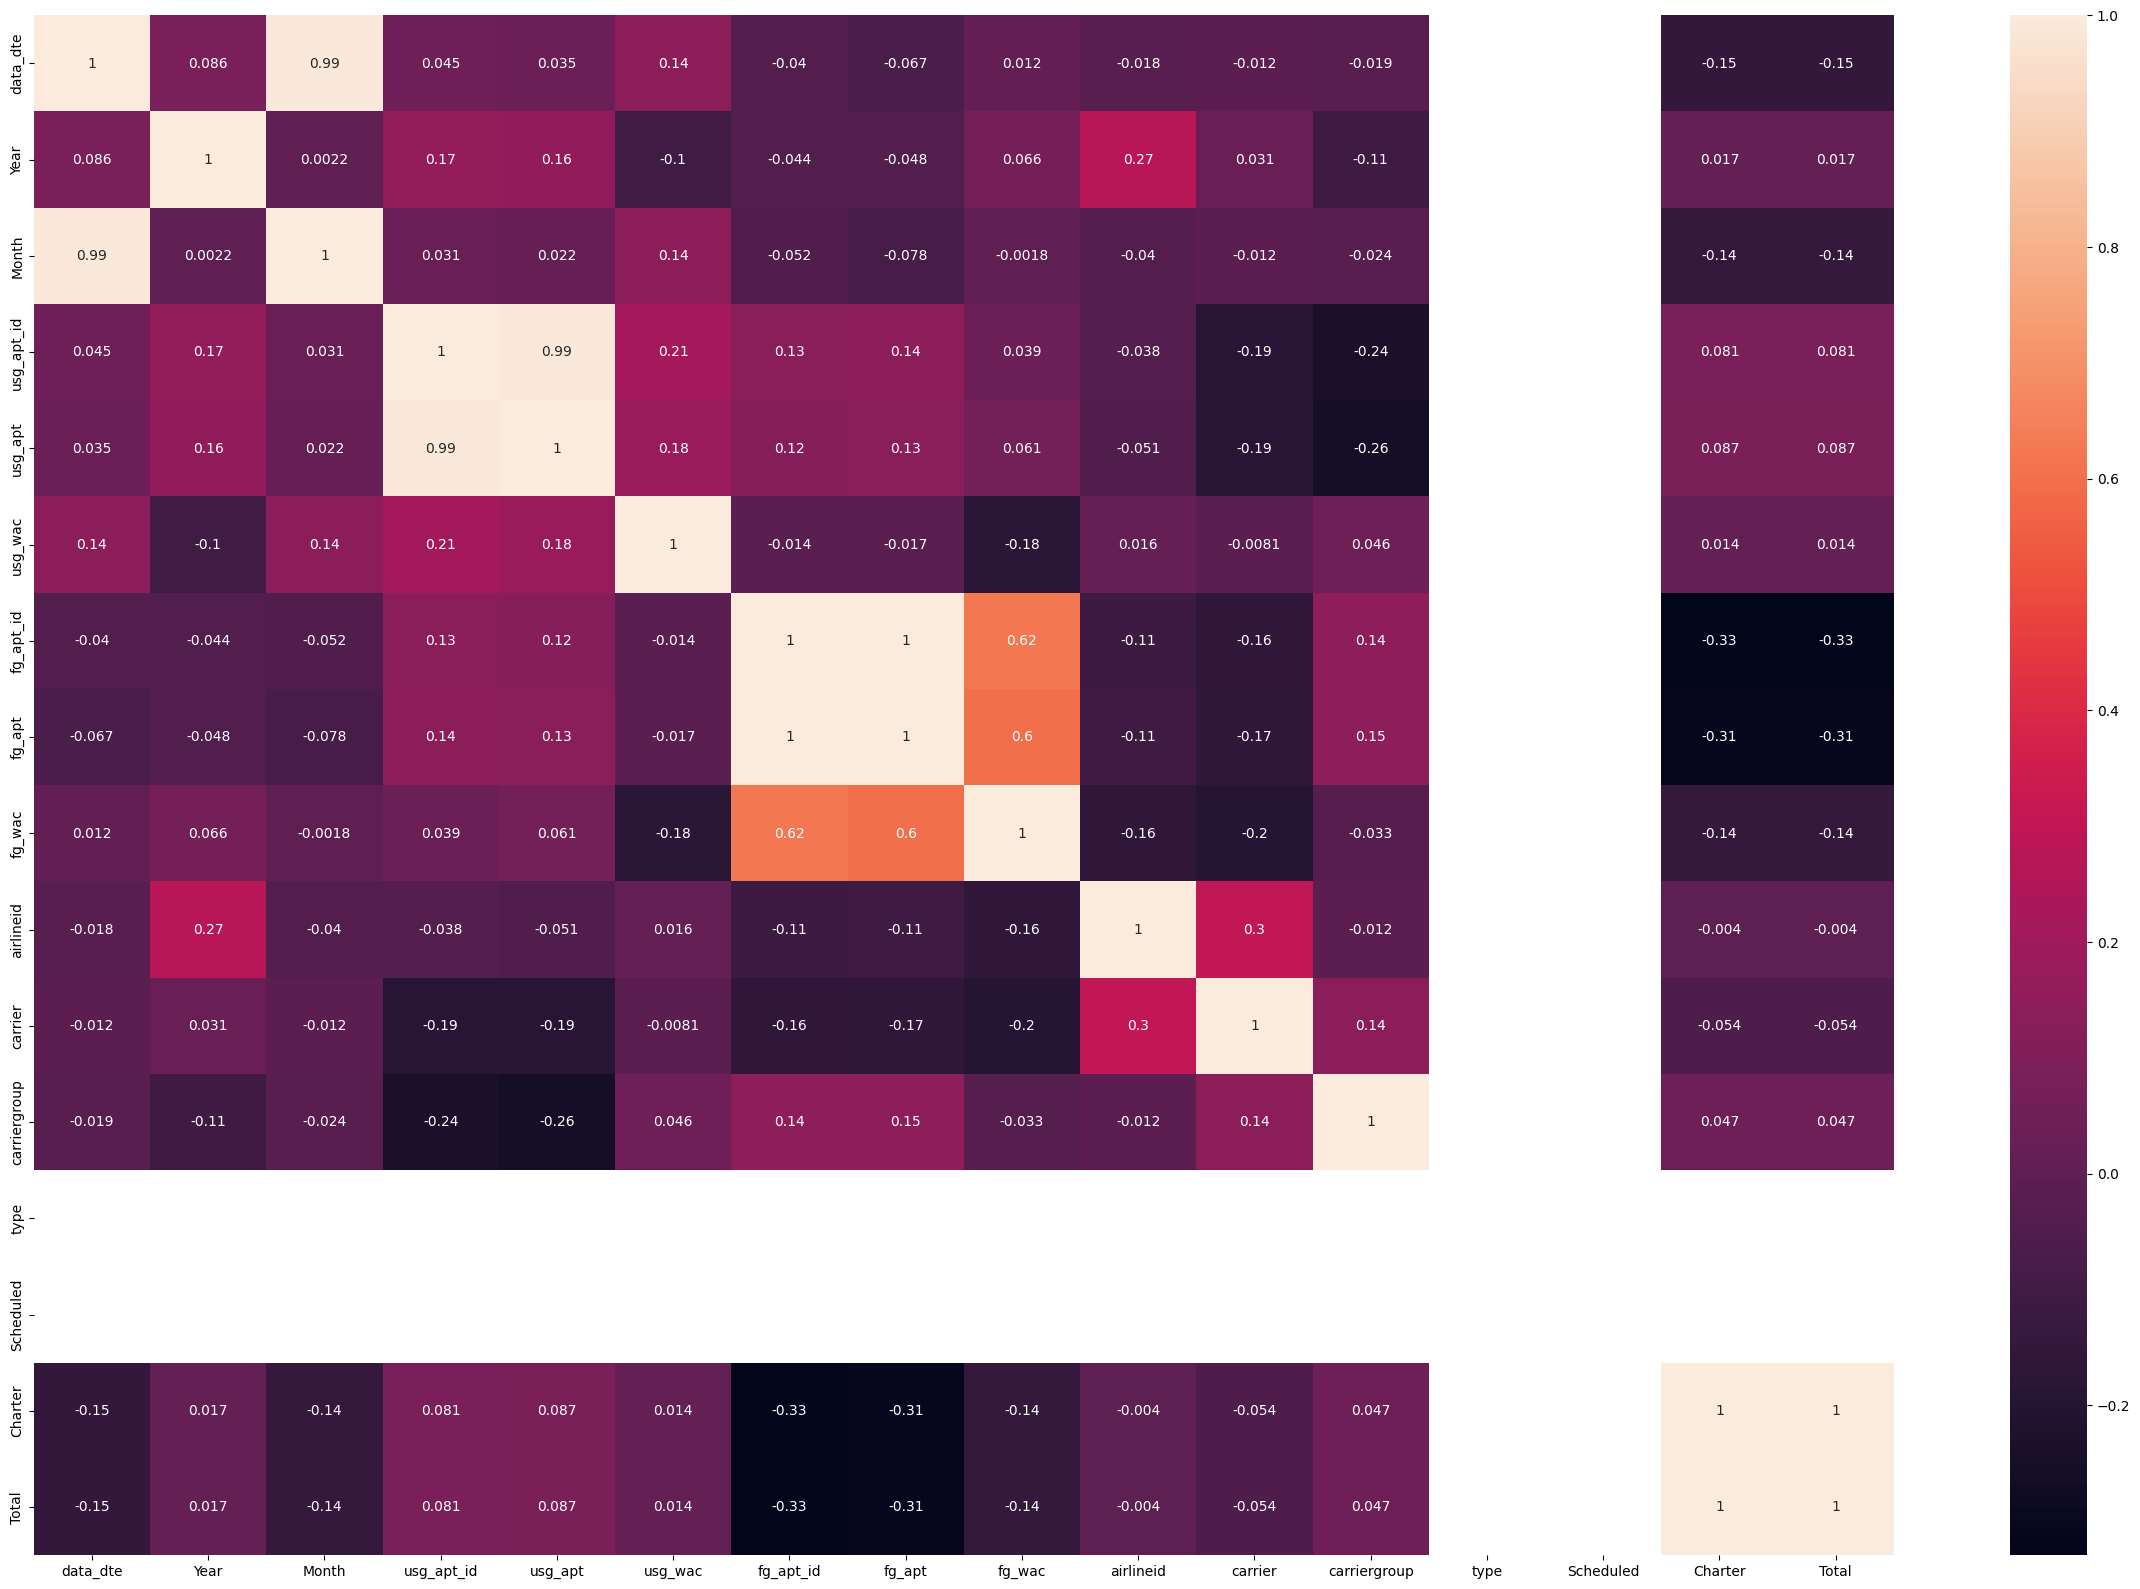

In [27]:
heatmap(df, figsize=(30, 20))

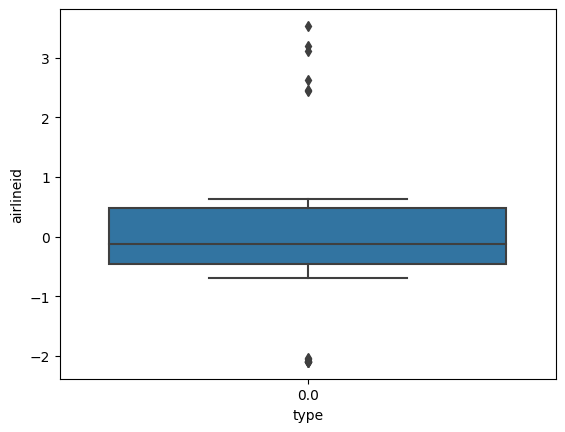

In [57]:
box(df, 'type', 'airlineid')

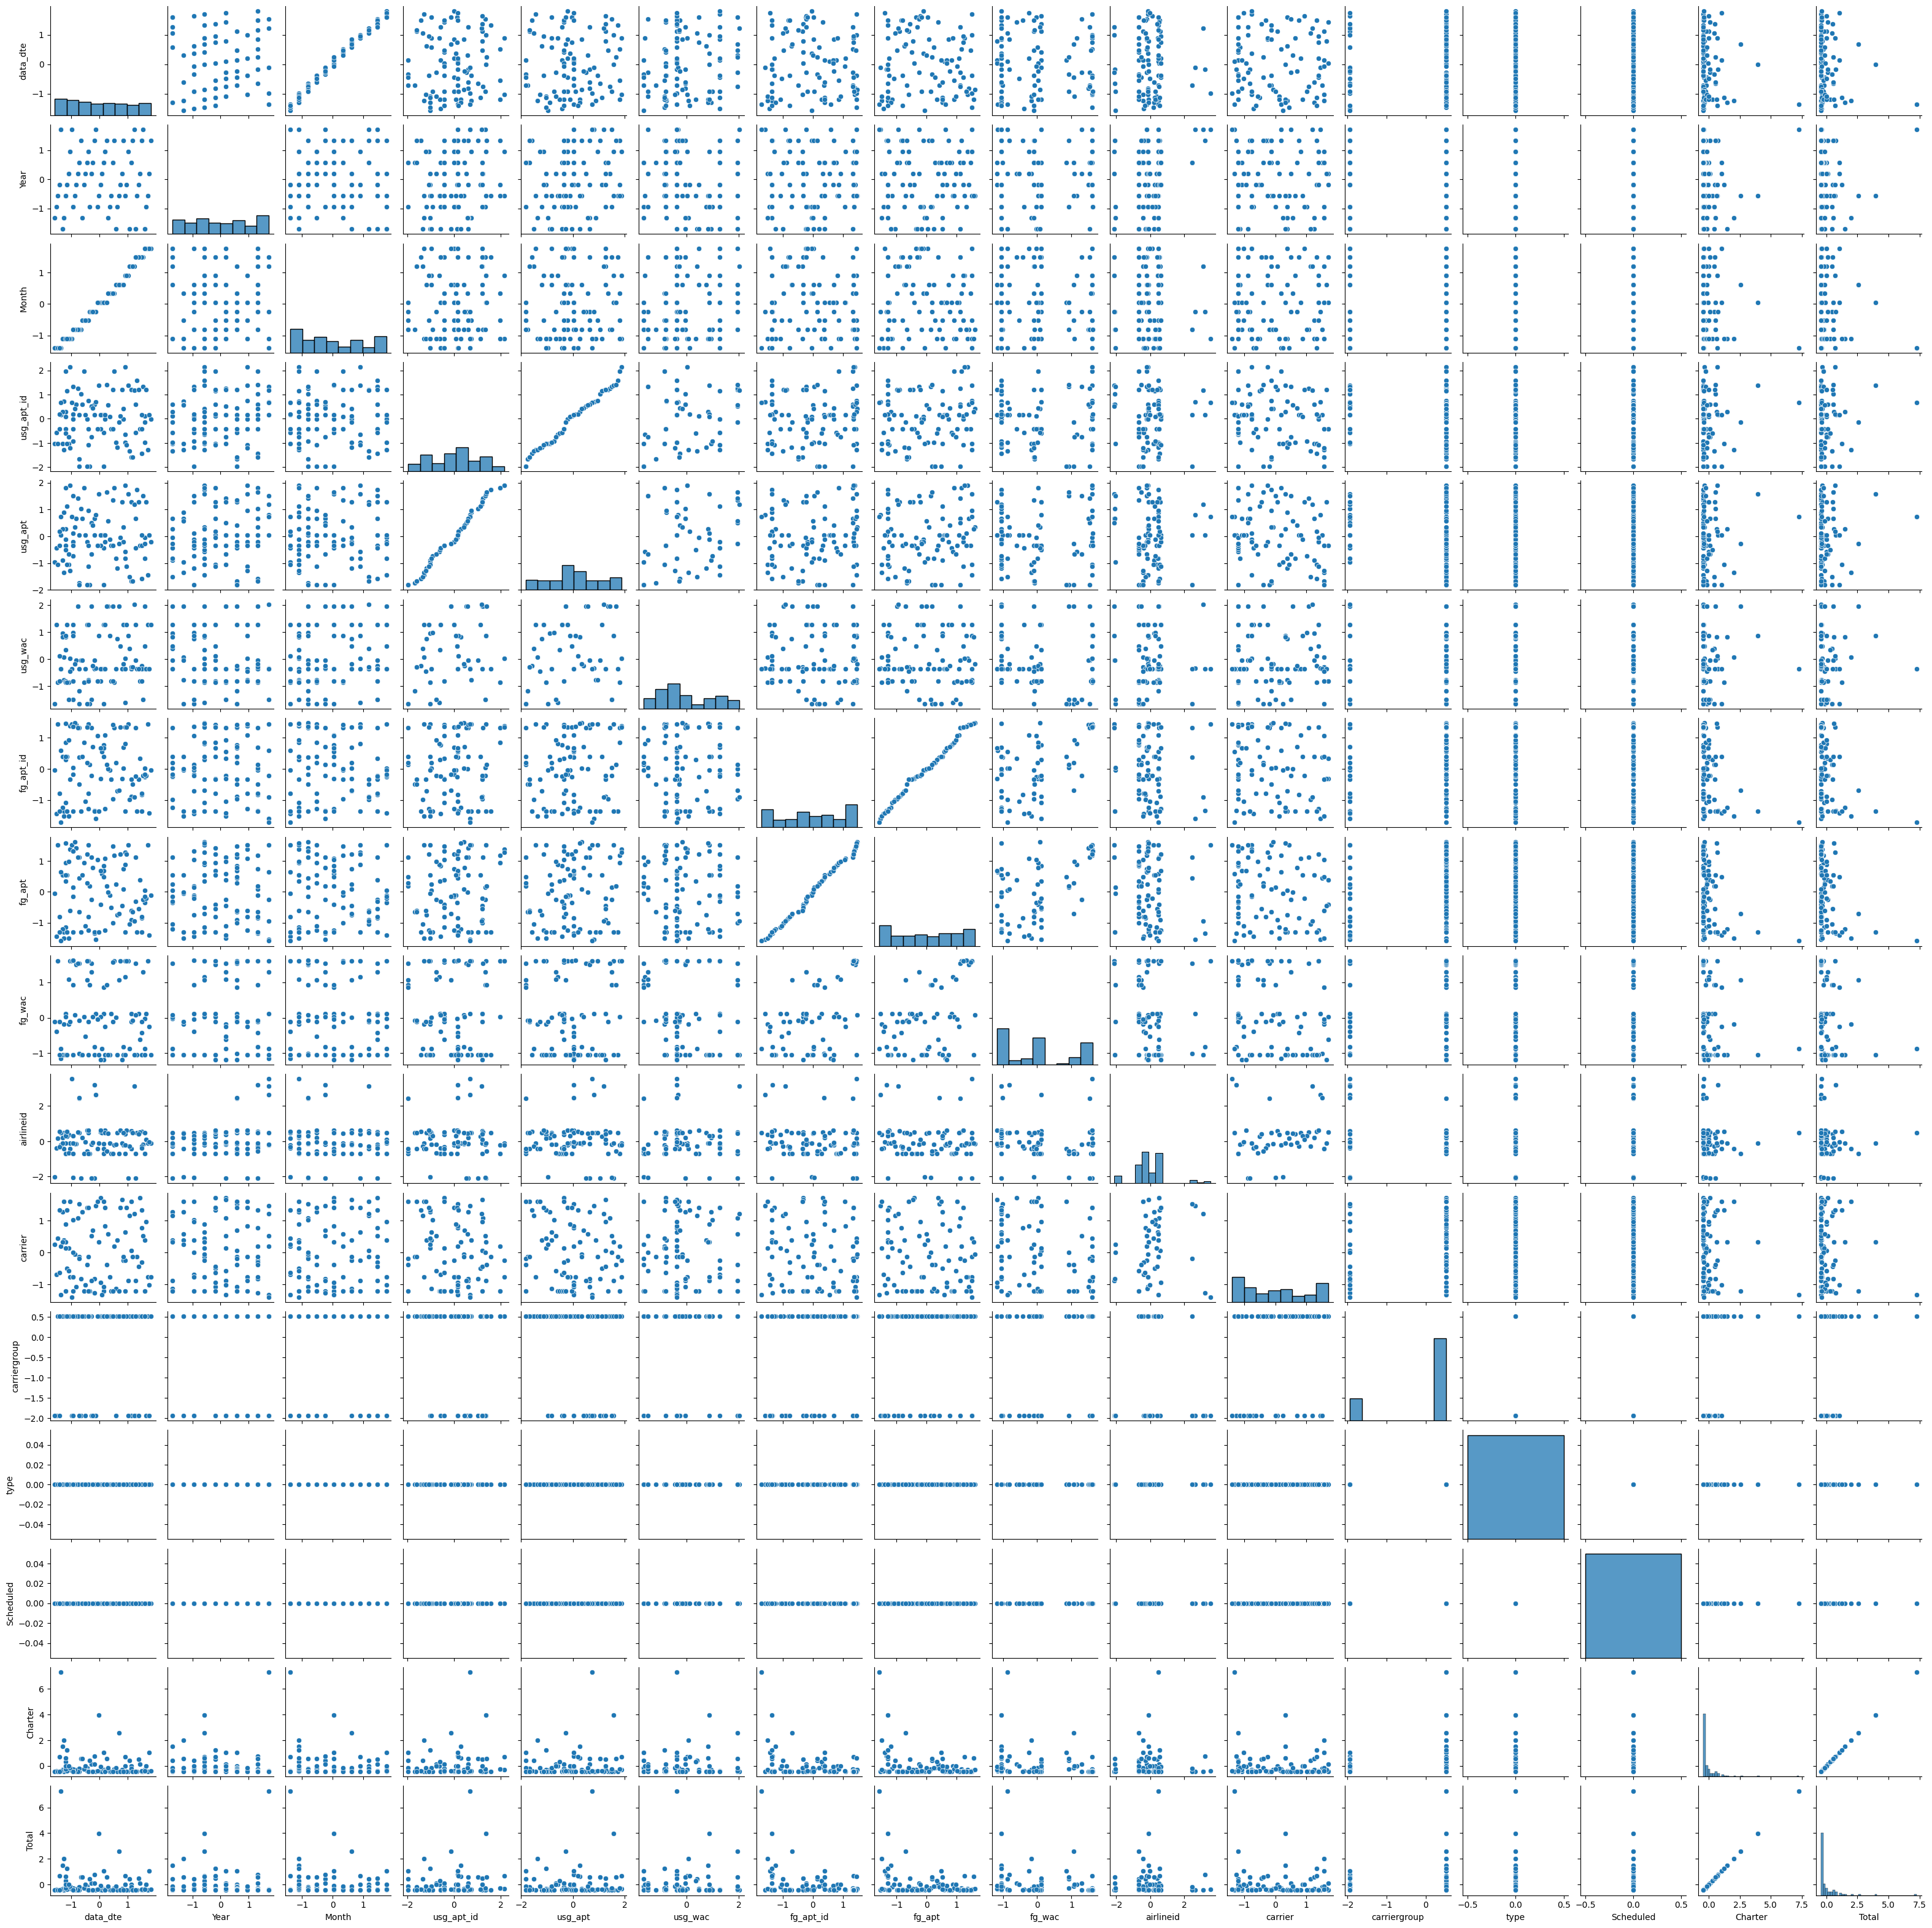

In [48]:
pairplot(df)

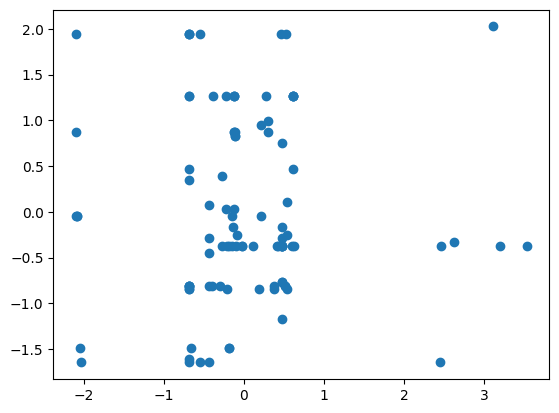

In [ ]:
scatter(df, 'airlineid', 'usg_wac')

In [58]:
data = read_data('BankChurners.csv', 'csv')

In [59]:
data = data.head(100)

In [60]:
data

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0   768805383  Existing Customer            45      M                3   
1   818770008  Existing Customer            49      F                5   
2   713982108  Existing Customer            51      M                3   
3   769911858  Existing Customer            40      F                4   
4   709106358  Existing Customer            40      M                3   
..        ...                ...           ...    ...              ...   
95  719712633  Existing Customer            64      M                1   
96  772629333  Existing Customer            45      M                3   
97  720336708  Existing Customer            53      M                3   
98  802013583  Existing Customer            56      M                3   
99  711887583  Attrited Customer            47      M                2   

   Education_Level Marital_Status Income_Category Card_Category  \
0      High School        Married     $60K - $80K          Blue   
1         Graduate         Single  Less than $40K          Blue   
2         Graduate        Married    $80K - $120K          Blue   
3      High School        Unknown  Less than $40K          Blue   
4       Uneducated        Married     $60K - $80K          Blue   
..             ...            ...             ...           ...   
95        Graduate        Married  Less than $40K          Blue   
96        Graduate        Married     $40K - $60K          Blue   
97       Doctorate        Married     $40K - $60K          Blue   
98         College        Married         $120K +          Blue   
99         Unknown        Married    $80K - $120K          Blue   

    Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0               39  ...       12691.0                  777          11914.0   
1               44  ...        8256.0                  864           7392.0   
2               36  ...        3418.0                    0           3418.0   
3               34  ...        3313.0                 2517            796.0   
4               21  ...        4716.0                    0           4716.0   
..             ...  ...           ...                  ...              ...   
95              52  ...        1709.0                  895            814.0   
96              35  ...        3454.0                 1200           2254.0   
97              35  ...        3789.0                 1706           2083.0   
98              50  ...        9689.0                 2250           7439.0   
99              37  ...        5449.0                 1628           3821.0   

    Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                  1.335             1144              42   
1                  1.541             1291              33   
2                  2.594             1887              20   
3                  1.405             1171              20   
4                  2.175              816              28   
..                   ...              ...             ...   
95                 1.656             1673              32   
96                 0.597             1313              30   
97                 1.047             1609              42   
98                 0.576             1158              19   
99                 0.696              836              18   

    Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                 1.625                  0.061   
1                 3.714                  0.105   
2                 2.333                  0.000   
3                 2.333                  0.760   
4                 2.500                  0.000   
..                  ...                    ...   
95                0.882                  0.524   
96                0.304                  0.347   
97                0.680                  0.450   
98                0.727                  0.232   
99                0.385                  0.299   

    Naive_Bayes_Classifier_

In [61]:
data = preprocess_data(data)

<ipython-input-4-9b70b2815b3f>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [62]:
data.head()

CLIENTNUM  Attrition_Flag  Customer_Age    Gender  Dependent_count  \
0   0.574175        0.274352     -0.660704  0.670280         0.477334   
1   1.845008        0.274352     -0.088666 -1.491914         2.068449   
2  -0.820236        0.274352      0.197353  0.670280         0.477334   
3   0.602318        0.274352     -1.375752 -1.491914         1.272892   
4  -0.944249        0.274352     -1.375752  0.670280         0.477334   

   Education_Level  Marital_Status  Income_Category  Card_Category  \
0        -0.021827       -0.659580        -0.354483      -0.242536   
1        -0.567502        0.714545         1.035647      -0.242536   
2        -0.567502       -0.659580         0.340582      -0.242536   
3        -0.021827        2.088669         1.035647      -0.242536   
4         1.069522       -0.659580        -0.354483      -0.242536   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0       -0.004042  ...      0.180817            -0.784894         0.240879   
1        0.669612  ...     -0.262420            -0.671407        -0.210915   
2       -0.408235  ...     -0.745934            -1.798442        -0.607957   
3       -0.677696  ...     -0.756427             1.484829        -0.869921   
4       -2.429198  ...     -0.616210            -1.798442        -0.478274   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0              0.298799        -0.560369        1.782807             0.822603   
1              0.651980        -0.082422        0.640795             4.014791   
2              2.457322         1.855380       -1.008777             1.904493   
3              0.418812        -0.472583       -1.008777             1.904493   
4              1.738957        -1.626810        0.006345             2.159685   

   Avg_Utilization_Ratio  \
0              -0.792755   
1              -0.625355   
2              -1.024833   
3               1.866629   
4              -1.024833   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                          -0.274591                                                                                    
1                                          -0.274735                                                                                    
2                                          -0.274876                                                                                    
3                                          -0.274433                                                                                    
4                                          -0.274873                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                           0.274605                                                                                   
1                                           0.274723                                                                                   
2                                           0.274881                                                                                   
3                                           0.274448                                                                                   
4                                           0.274881                                                                                   

[5 rows x 23 columns]

In [63]:
reduce_dimensionality(data, 5)

array([[-9.68568218e-01,  1.10768254e+00,  1.16405363e-01,
         9.60681477e-02, -1.02133614e+00],
       [-1.60497126e+00, -8.76574179e-02, -1.87328707e+00,
         1.41907017e+00,  2.80817657e-01],
       [-1.08682466e+00, -2.18479533e-01, -4.66428258e-01,
         4.39012114e+00,  2.54735293e-01],
       [-1.00497847e+00, -1.35994498e+00, -3.21586860e+00,
         4.38547050e-01,  1.29026556e+00],
       [-9.29545594e-01,  1.29453773e+00, -2.62957935e+00,
         3.55391047e+00, -1.77959319e+00],
       [-6.87512432e-02, -1.18120370e-01, -1.30397535e-01,
         8.47504243e-01, -1.14556717e+00],
       [-1.25390973e+00,  3.77496159e+00,  2.25722234e+00,
        -1.01112008e+00, -9.95173975e-01],
       [-1.09280920e+00,  4.64342390e+00,  4.86413946e-01,
        -8.76678482e-01,  3.04522259e+00],
       [-1.90586523e+00,  2.02482492e+00, -6.33578482e-01,
         2.49040432e+00,  1.53472382e-02],
       [-8.66156237e-01,  2.11966877e-01,  9.93059191e-02,
        -1.96387016e-01

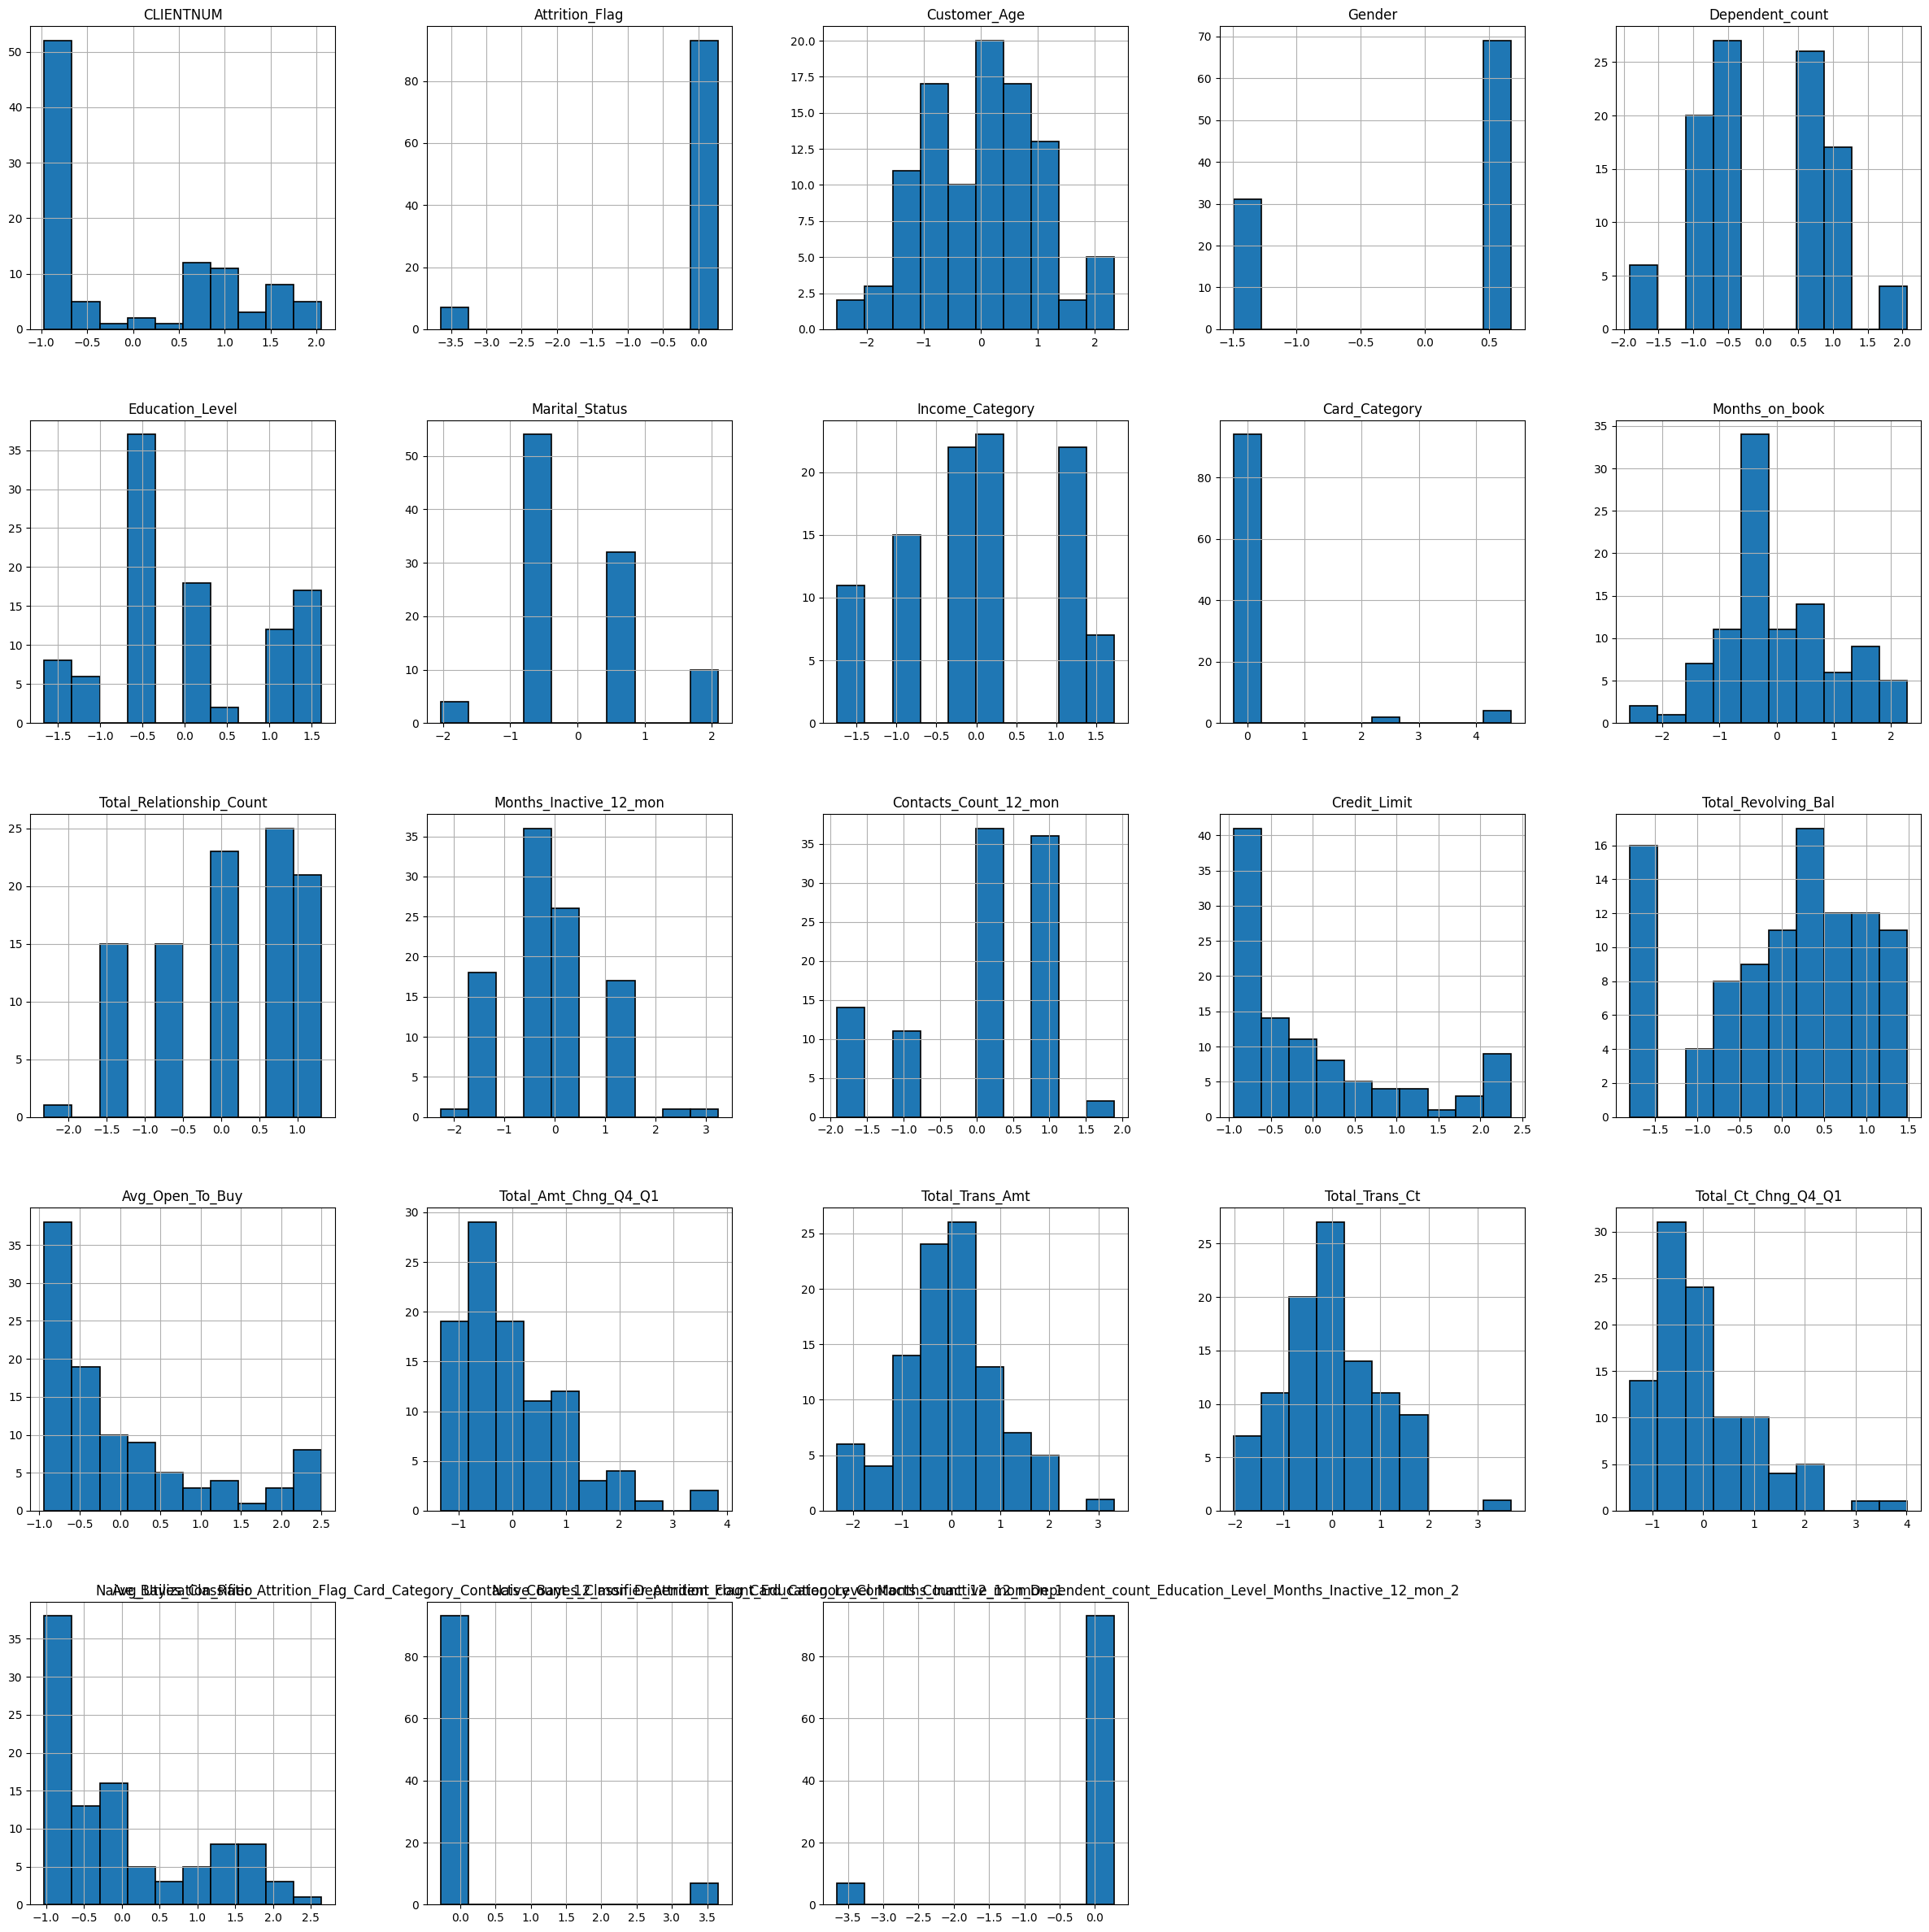

In [64]:
histogram(data, edgecolor="black", figsize=(30, 30))

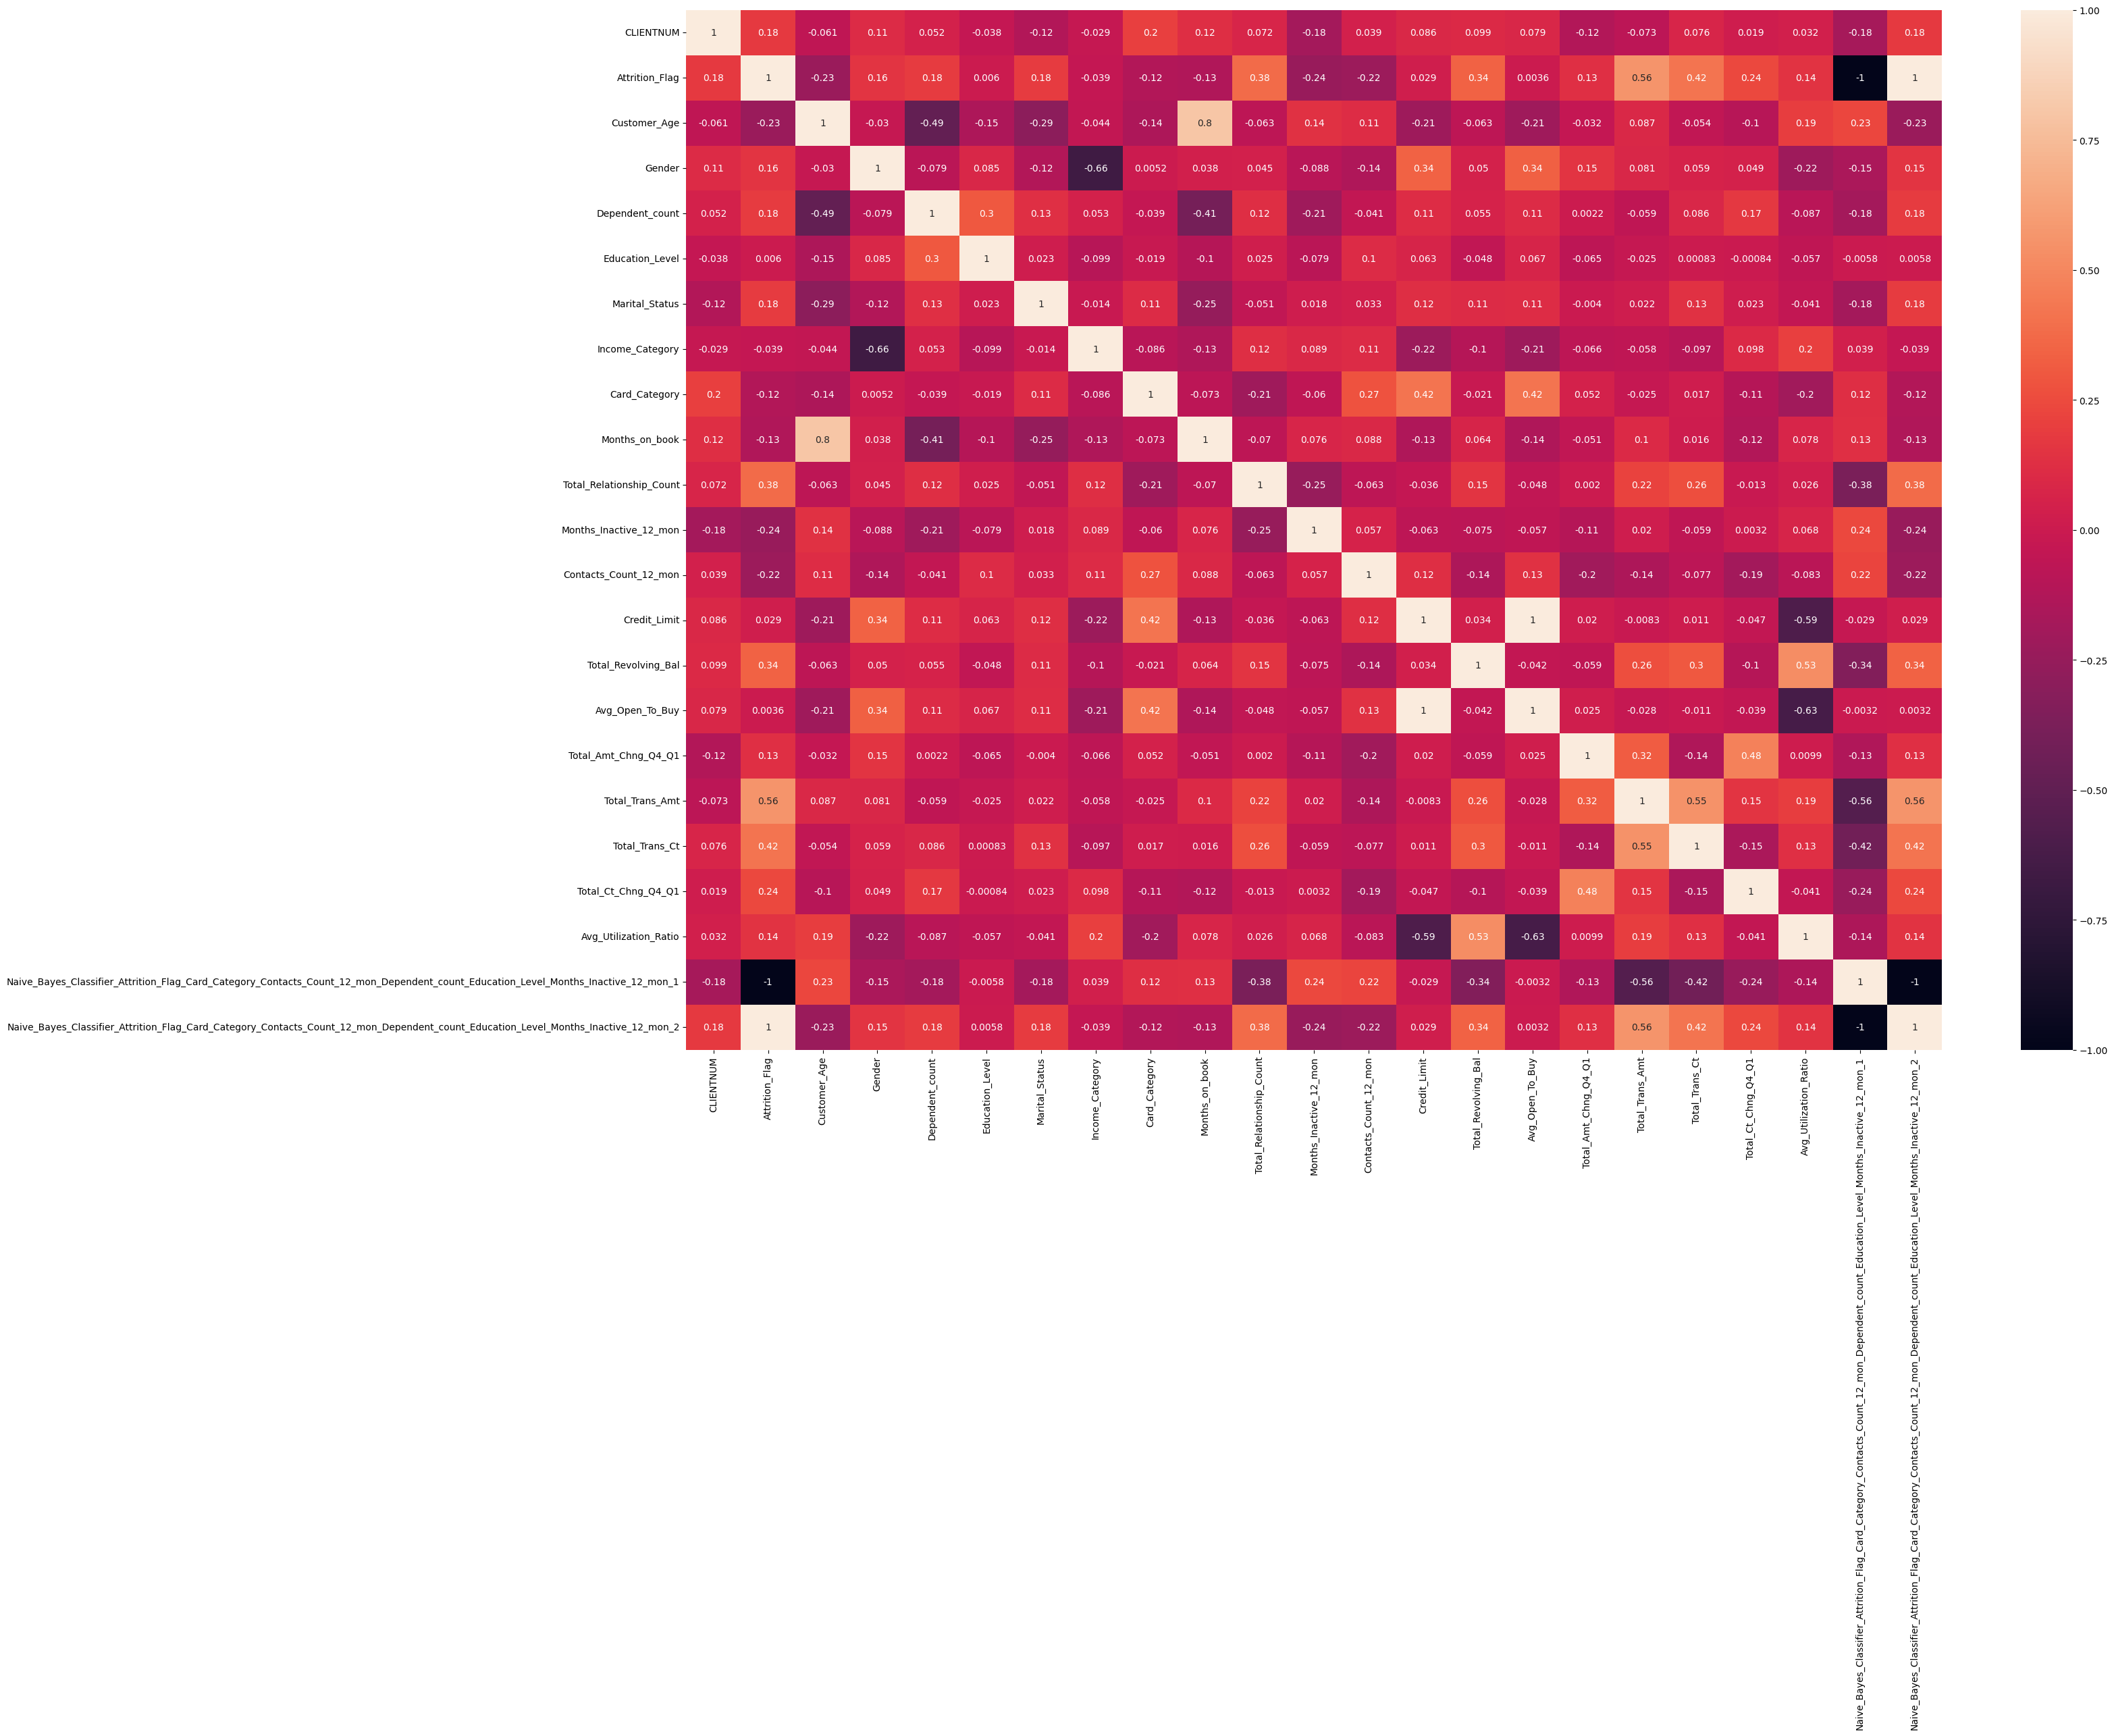

In [67]:
heatmap(data, figsize=(30, 20))

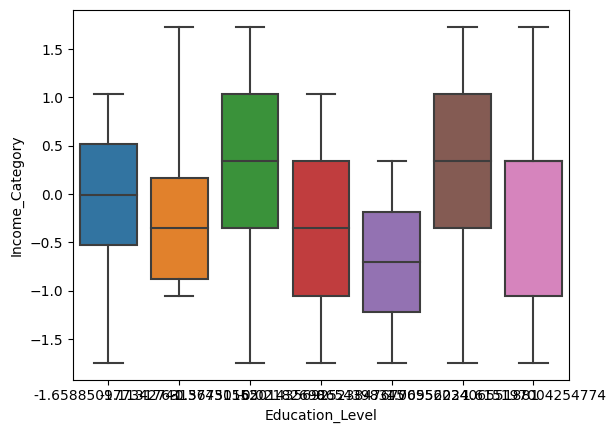

In [68]:
box(data, 'Education_Level', 'Income_Category')

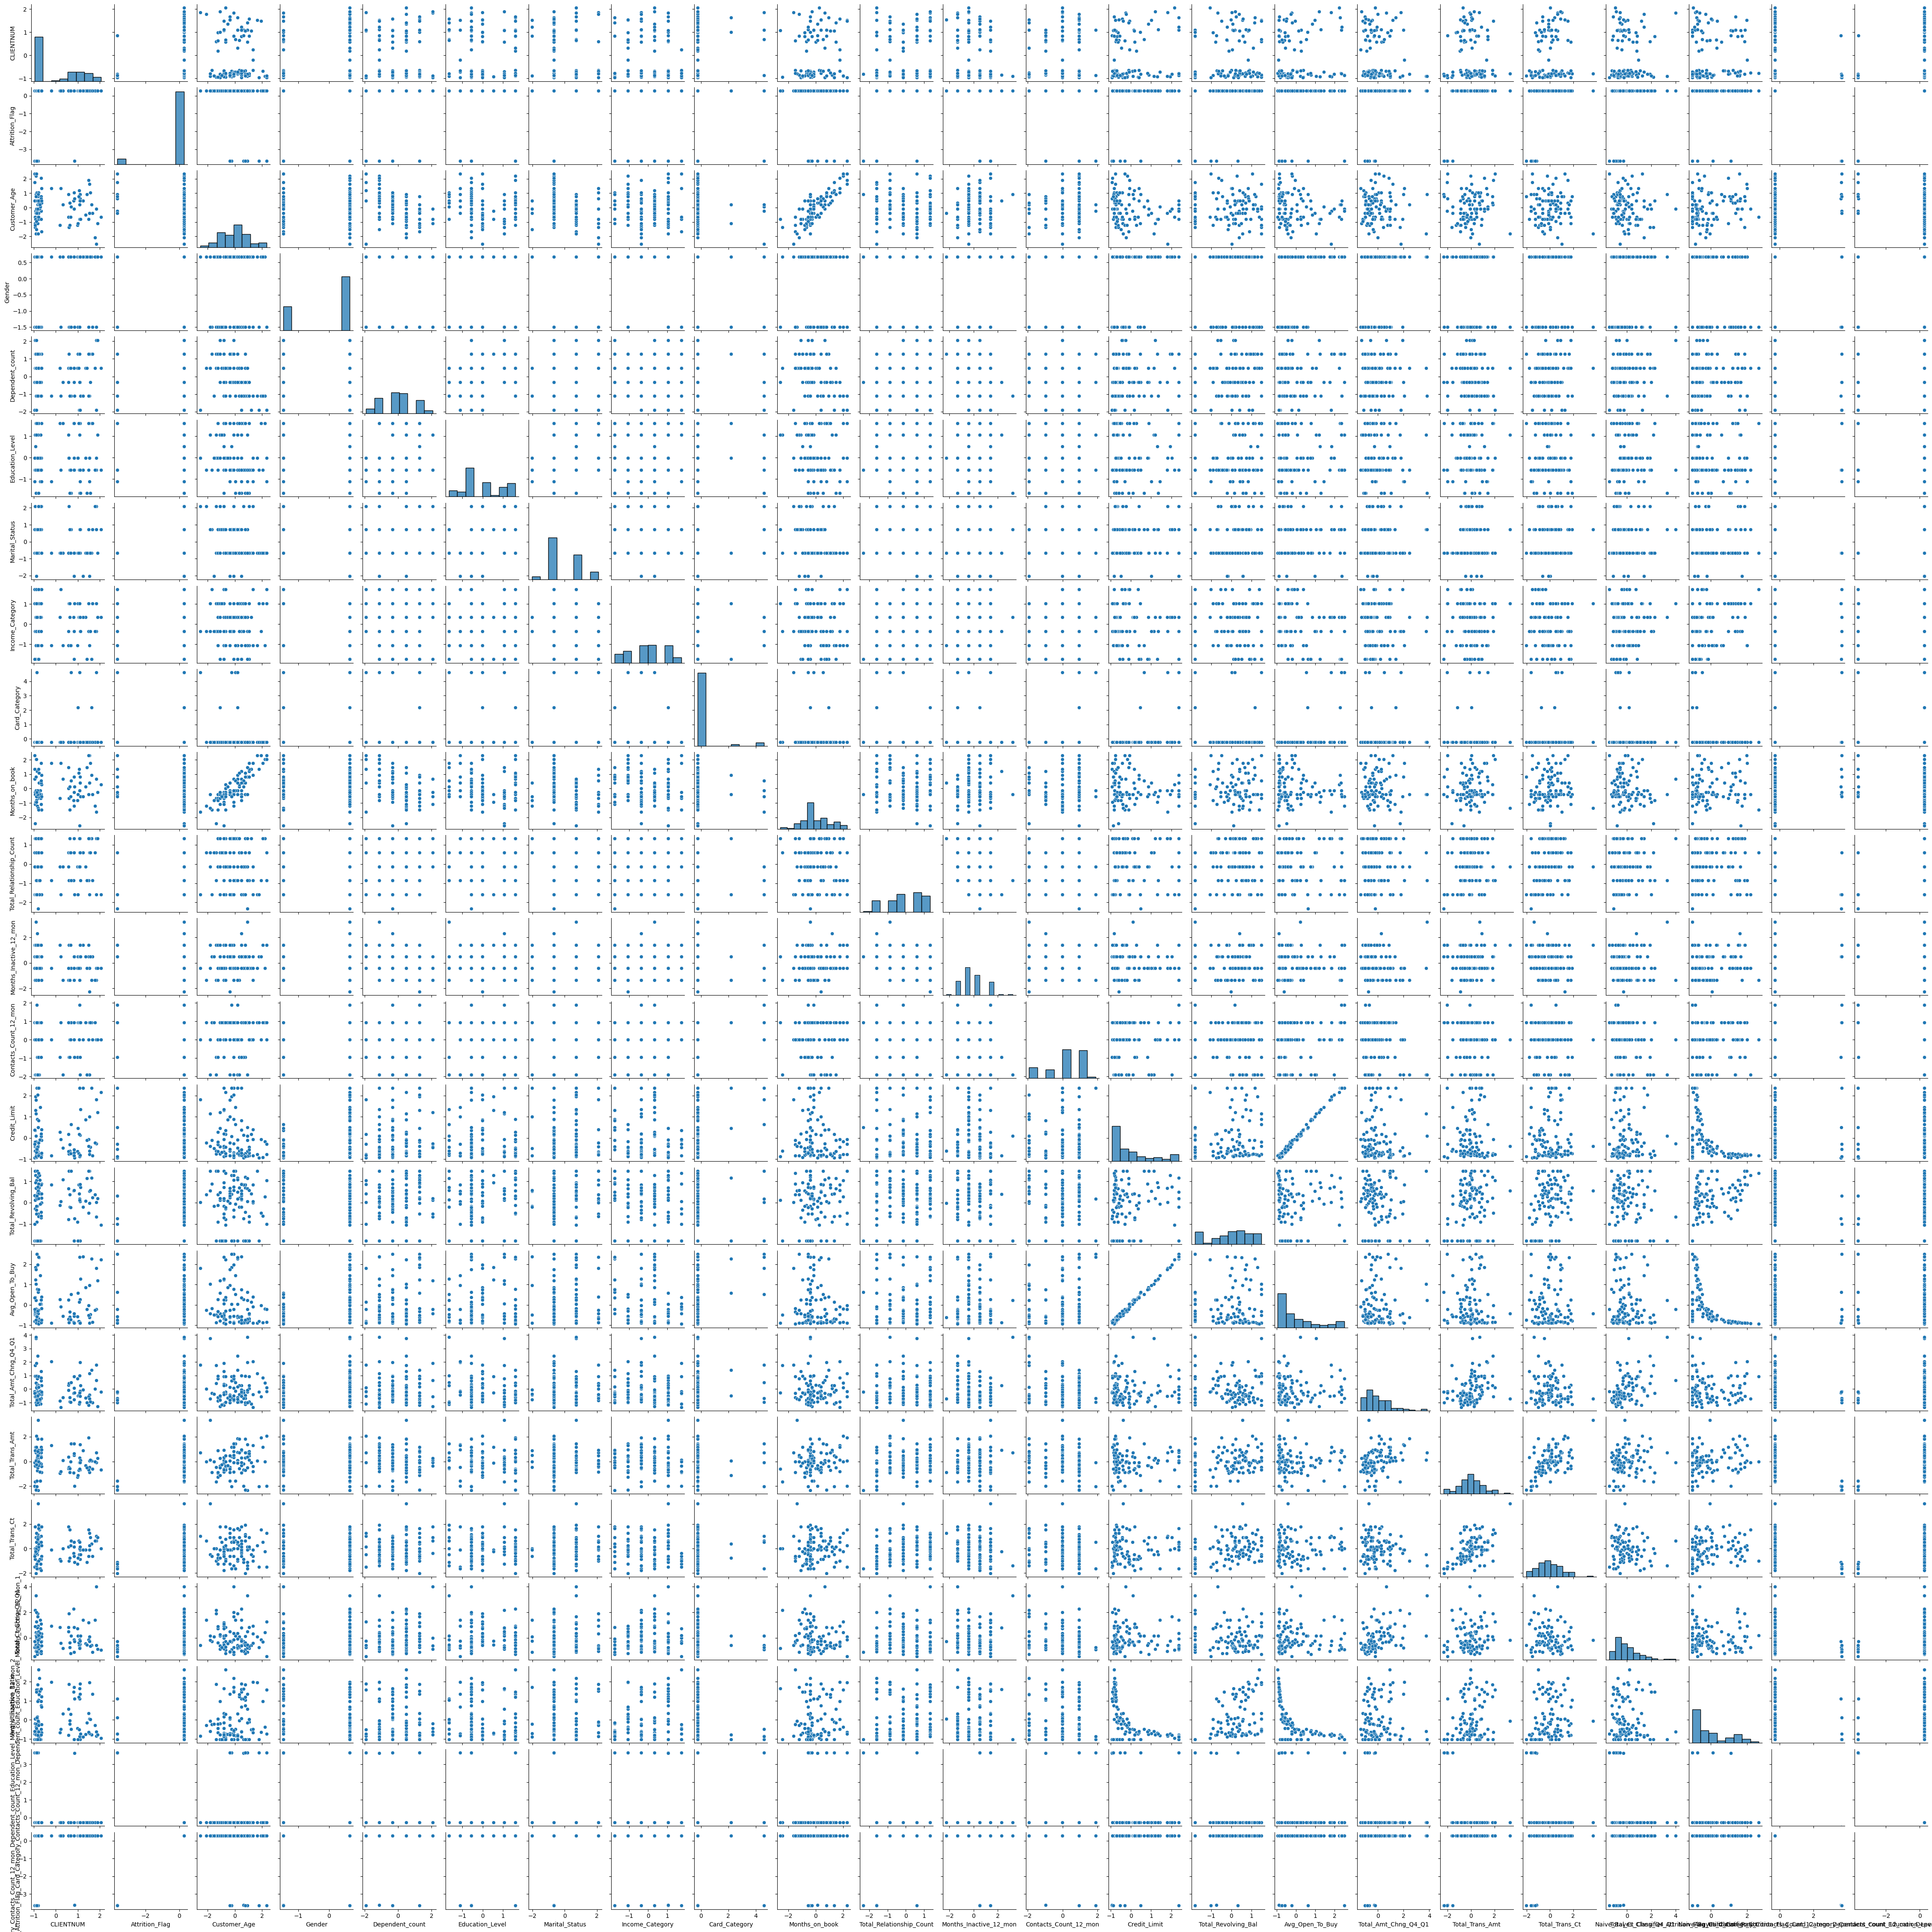

In [69]:
pairplot(data)

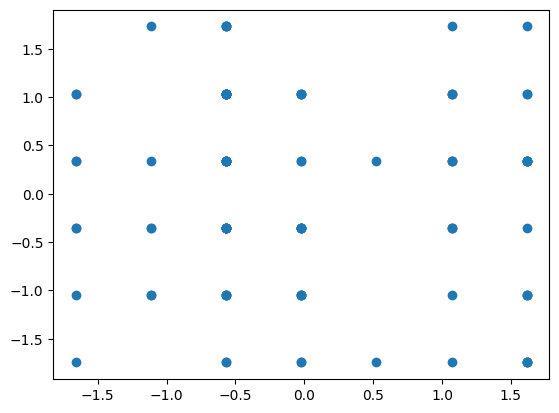

In [70]:
scatter(data, 'Education_Level', 'Income_Category')